<a href="https://colab.research.google.com/github/Patriol-LLC/0625/blob/main/Wireshark_Deep_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print('Success')

Success


In [8]:
traffic = pd.read_csv('/content/Full_Traffic.csv', index_col='Time', parse_dates=True)
traffic.head()

,Source,Source Port,Destination,Destination Port,Host,Server Name,Info,Protocol
Time,,,,,,,,
2018-08-03 19:06:20,192.168.10.195,62006,192.168.10.1,53,NaN,NaN,Standard query 0xdf27 A college.usatoday.com,DNS
2018-08-03 19:06:20,192.168.10.1,53,192.168.10.195,62006,NaN,NaN,Standard query response 0xdf27 A college.usato...,DNS
2018-08-03 19:06:20,192.168.10.195,49714,192.0.79.32,80,NaN,NaN,49714 > 80 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,TCP
2018-08-03 19:06:20,192.0.79.32,80,192.168.10.195,49714,NaN,NaN,"80 > 49714 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...",TCP
2018-08-03 19:06:20,192.168.10.195,49714,192.0.79.32,80,NaN,NaN,49714 > 80 [ACK] Seq=1 Ack=1 Win=65535 Len=0,TCP


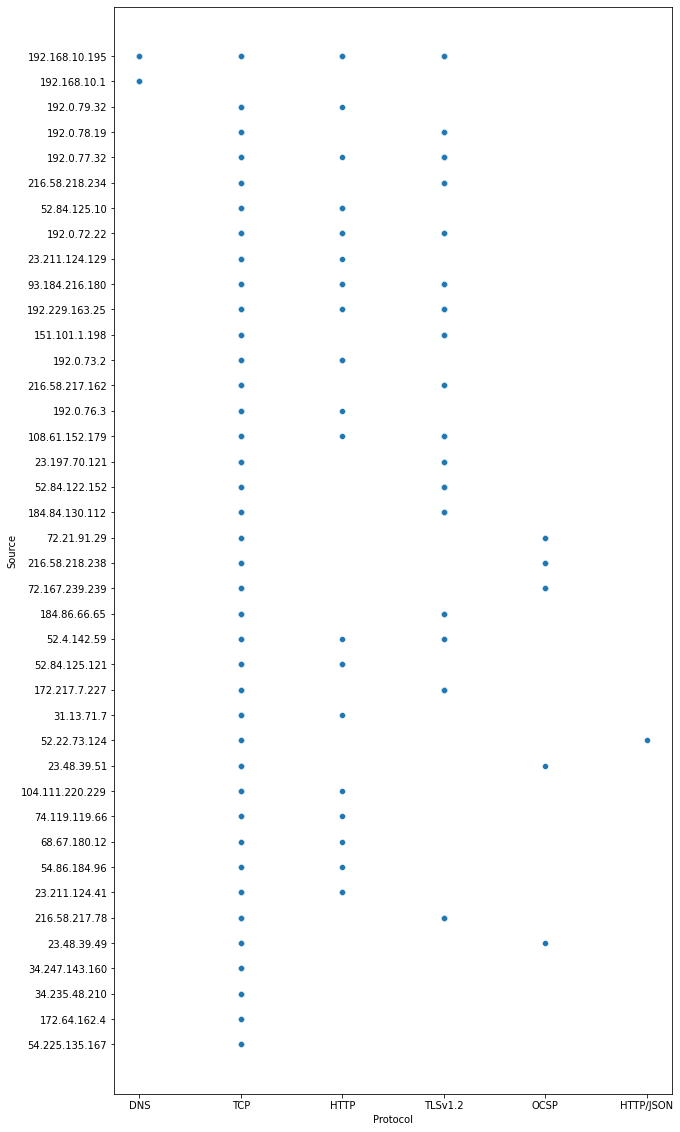

In [17]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=traffic.Protocol, y=traffic.Source)

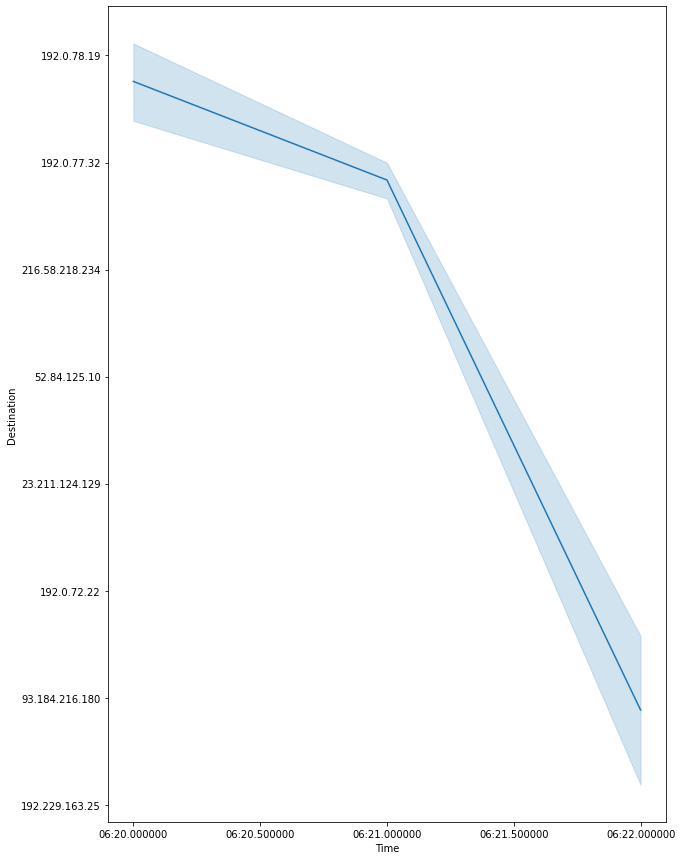

In [25]:
plt.figure(figsize=(10,15))
sns.lineplot(data=traffic['Destination'])

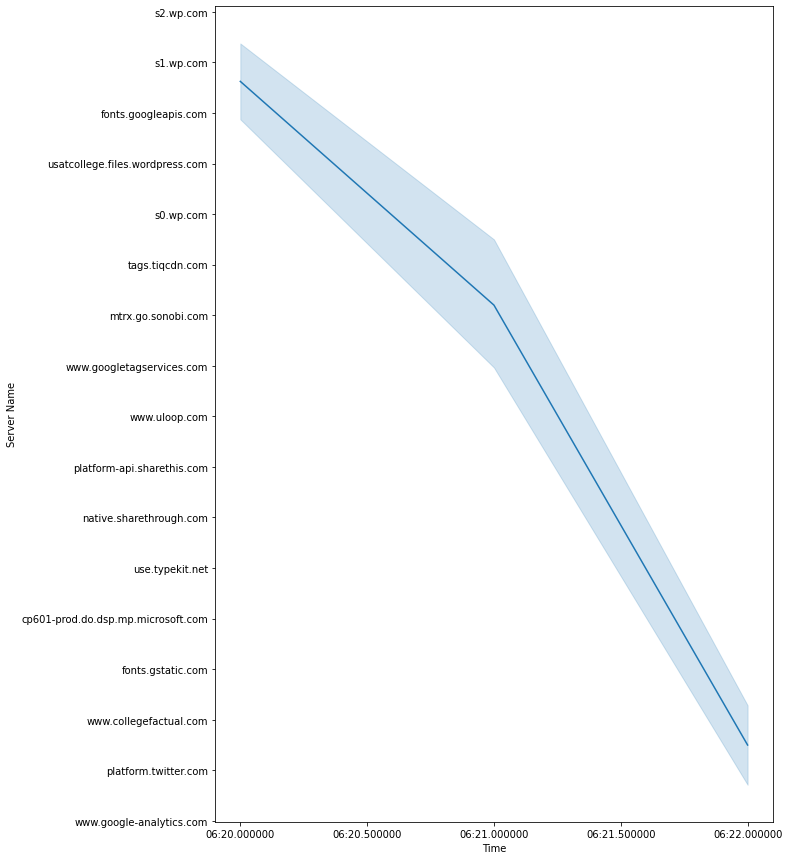

In [26]:
plt.figure(figsize=(10,15))
sns.lineplot(data=traffic['Server Name'])

In [41]:
devices = traffic.Source.unique()
devices.size

40

In [42]:
servers = traffic['Server Name'].unique()
servers.size

20

In [71]:
dummies = pd.get_dummies(traffic, columns=['Protocol'], prefix="", prefix_sep="")
merged = pd.concat([traffic,dummies], axis='columns')
#DNS HTTP  HTTP/JSON  OCSP  TCP  TLSv1.2
merged.drop(['DNS','HTTP','HTTP/JSON','OCSP','TCP','TLSv1.2'], axis='columns')
merged.drop('Protocol', axis='columns')


,Source,Source Port,Destination,Destination Port,Host,Server Name,Info,Source,Source Port,Destination,Destination Port,Host,Server Name,Info,DNS,HTTP,HTTP/JSON,OCSP,TCP,TLSv1.2
Time,,,,,,,,,,,,,,,,,,,,
2018-08-03 19:06:20,192.168.10.195,62006,192.168.10.1,53,NaN,NaN,Standard query 0xdf27 A college.usatoday.com,192.168.10.195,62006,192.168.10.1,53,NaN,NaN,Standard query 0xdf27 A college.usatoday.com,1,0,0,0,0,0
2018-08-03 19:06:20,192.168.10.1,53,192.168.10.195,62006,NaN,NaN,Standard query response 0xdf27 A college.usato...,192.168.10.1,53,192.168.10.195,62006,NaN,NaN,Standard query response 0xdf27 A college.usato...,1,0,0,0,0,0
2018-08-03 19:06:20,192.168.10.195,49714,192.0.79.32,80,NaN,NaN,49714 > 80 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,192.168.10.195,49714,192.0.79.32,80,NaN,NaN,49714 > 80 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,0,0,0,0,1,0
2018-08-03 19:06:20,192.0.79.32,80,192.168.10.195,49714,NaN,NaN,"80 > 49714 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...",192.0.79.32,80,192.168.10.195,49714,NaN,NaN,"80 > 49714 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...",0,0,0,0,1,0
2018-08-03 19:06:20,192.168.10.195,49714,192.0.79.32,80,NaN,NaN,49714 > 80 [ACK] Seq=1 Ack=1 Win=65535 Len=0,192.168.10.195,49714,192.0.79.32,80,NaN,NaN,49714 > 80 [ACK] Seq=1 Ack=1 Win=65535 Len=0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-03 19:06:22,108.61.152.179,443,192.168.10.195,49763,NaN,NaN,443 > 49763 [ACK] Seq=10985 Ack=1909 Win=642...,108.61.152.179,443,192.168.10.195,49763,NaN,NaN,443 > 49763 [ACK] Seq=10985 Ack=1909 Win=642...,0,0,0,0,1,0
2018-08-03 19:06:22,108.61.152.179,443,192.168.10.195,49766,NaN,NaN,443 > 49766 [ACK] Seq=7588 Ack=1629 Win=6424...,108.61.152.179,443,192.168.10.195,49766,NaN,NaN,443 > 49766 [ACK] Seq=7588 Ack=1629 Win=6424...,0,0,0,0,1,0
2018-08-03 19:06:22,192.0.76.3,80,192.168.10.195,49836,NaN,NaN,"80 > 49836 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...",192.0.76.3,80,192.168.10.195,49836,NaN,NaN,"80 > 49836 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...",0,0,0,0,1,0


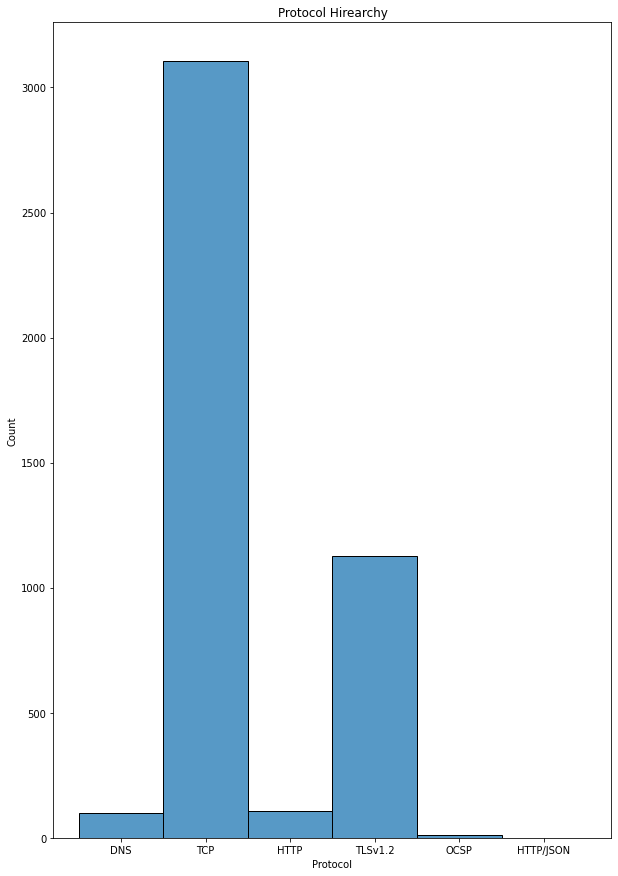

In [100]:
plt.figure(figsize=(10,15))
plt.title('Protocol Hirearchy')
sns.histplot(traffic['Protocol'])

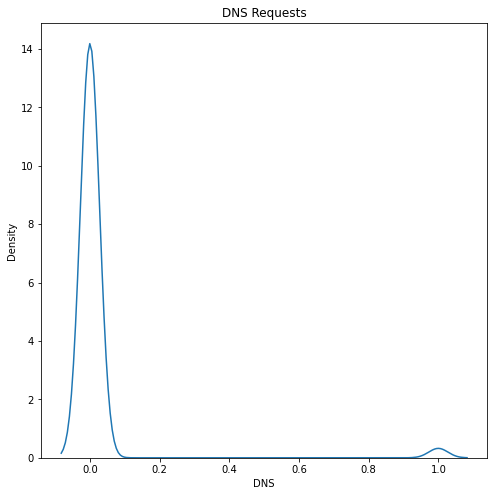

In [93]:
plt.figure(figsize=(8,8))
plt.title('DNS Requests')
sns.kdeplot(data=merged['DNS'])

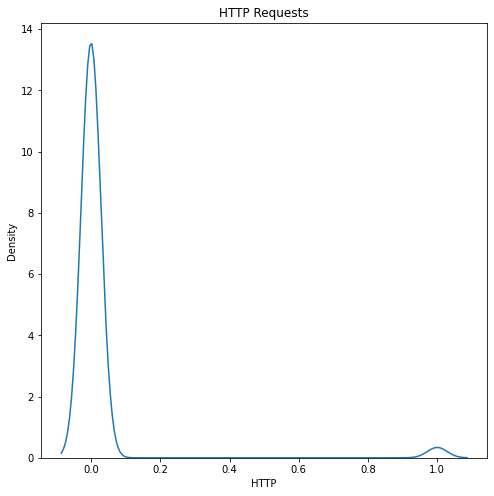

In [94]:
plt.figure(figsize=(8,8))
plt.title('HTTP Requests')
sns.kdeplot(data=merged['HTTP'])

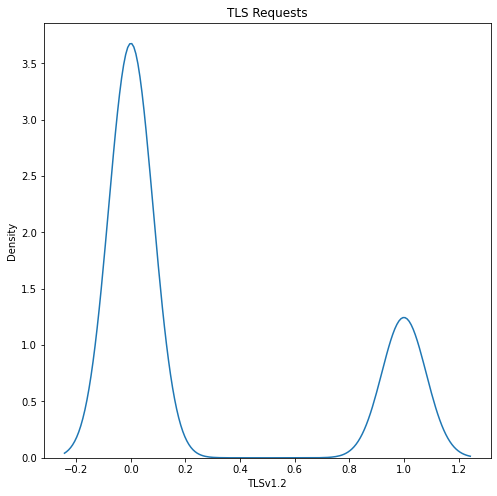

In [96]:
plt.figure(figsize=(8,8))
plt.title('TLS Requests')
sns.kdeplot(data=merged['TLSv1.2'])

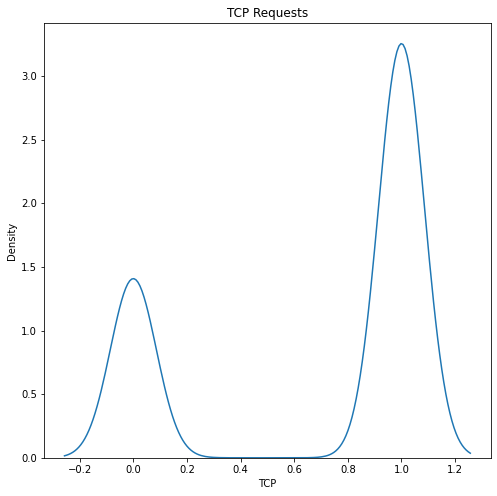

In [97]:
plt.figure(figsize=(8,8))
plt.title('TCP Requests')
sns.kdeplot(data=merged['TCP'])